Data 19/09/2024

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import pickle
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display


In [2]:
from sklearn import tree

In [3]:
# x_treino, y_treino, x_teste, y_teste
with open(file='credit.pkl', mode="rb") as file:
    X_treinamento, y_treinamento, X_teste, Y_teste = pickle.load(file)

Temos somados 2000 registros. Dividimos a base de teste e treinamento em 1500 (75%) para treinamento e 500 (25%) para teste

In [4]:
# 1500 registros, 3 colunas (renda, divida e idade)
X_treinamento.shape , X_teste.shape

((1500, 3), (500, 3))

In [5]:
# random_state = 0 serve para quando executar novamente o algoritmo sempre dar o mesmo resultado
credit_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
credit_tree.fit(X=X_treinamento, y=y_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
# Passar os 500 registros de teste para a árvore
previsoes = credit_tree.predict(X_teste)


In [8]:
# 1 - não pagou o empréstimo e 0 = pagou o empréstimo
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Comparando com os resultados reais da base de dados**  - utiliza o módulo *sklearn.metrics*

In [9]:
from sklearn.metrics import accuracy_score, classification_report

In [10]:
accuracy_score(y_true=Y_teste, y_pred=previsoes)

0.982

Melhor que o algoritmo Naive Bayes (93.8%)

Criando a matriz de confusão - biblioteca yellowbrick

In [11]:
from yellowbrick.classifier import ConfusionMatrix

In [12]:
cm = ConfusionMatrix(credit_tree)

0.982

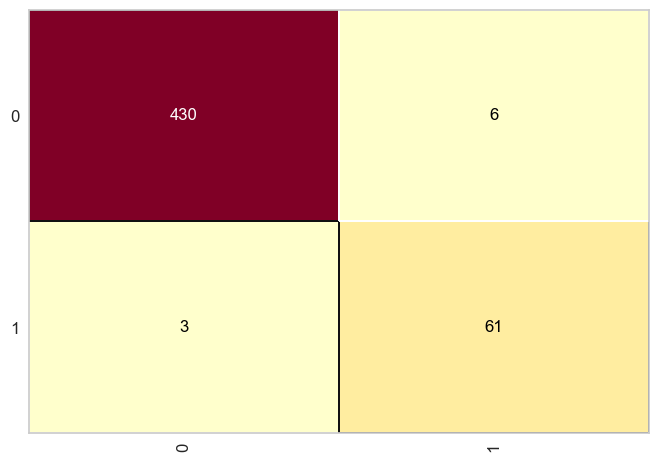

In [13]:
cm.fit(X=X_treinamento, y=y_treinamento)
cm.score(X_teste, Y_teste)

**Na base Naive Bayes**:  
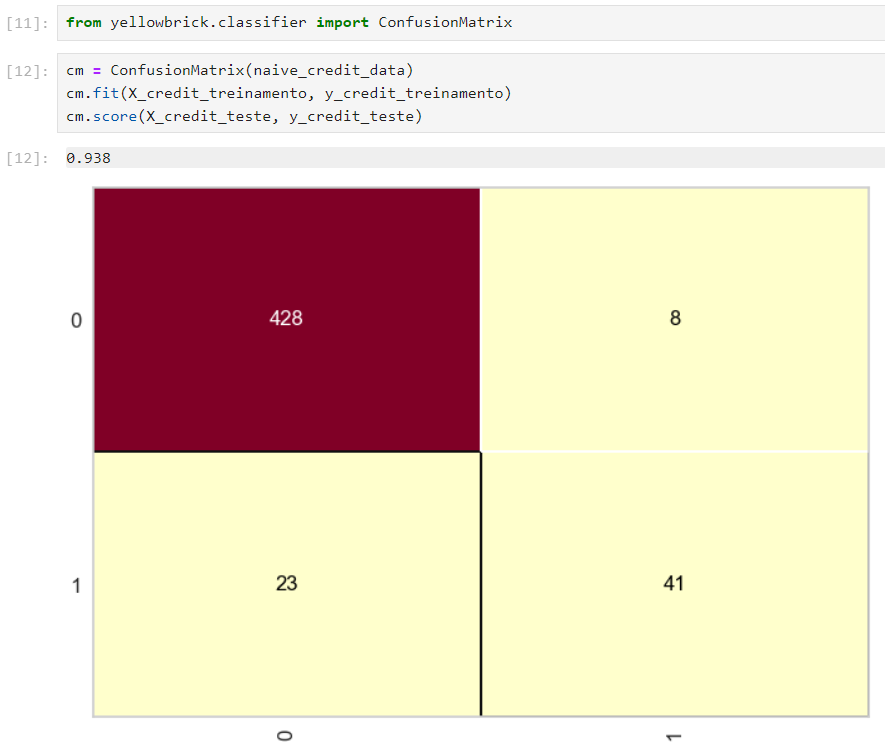  

A árvore de decisão acertou mais que o Naive Bayes, tendo apenas 3 registros classificados como a classe errada. (elemento $a_{21}$)


In [14]:
print(classification_report(y_true=Y_teste, y_pred=previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



No contexto do **classification report** do `sklearn`, o **recall** e a **precision** são métricas de avaliação de desempenho para modelos de classificação.

**Precision**  
A **precisão** (precision) indica a proporção de exemplos corretamente classificados como positivos em relação ao total de exemplos classificados como positivos. Em outras palavras, mede a **exatidão** das previsões positivas.

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

- **True Positives (TP)**: Casos corretamente classificados como positivos.
- **False Positives (FP)**: Casos incorretamente classificados como positivos.

**Exemplo:** Se um modelo previu 10 exemplos como positivos, mas apenas 8 estão corretos, a precisão será 80%.

**Recall**  
O **recall** mede a capacidade do modelo de encontrar todos os exemplos positivos. Ele calcula a proporção de exemplos que deveriam ser classificados como positivos e foram corretamente classificados dessa forma.

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

- **True Positives (TP)**: Casos corretamente classificados como positivos.
- **False Negatives (FN)**: Casos que deveriam ser classificados como positivos, mas foram classificados como negativos.

**Exemplo:** Se havia 10 exemplos positivos e o modelo encontrou corretamente 8, o recall será 80%.

Resumo:

- **Precision**: Das previsões positivas, quantas estão corretas?
- **Recall**: Dos exemplos que realmente são positivos, quantos o modelo identificou corretamente?

No **classification report** do `sklearn`, essas métricas ajudam a avaliar o desempenho do modelo em identificar as classes corretamente.

Visualizando a Árvore

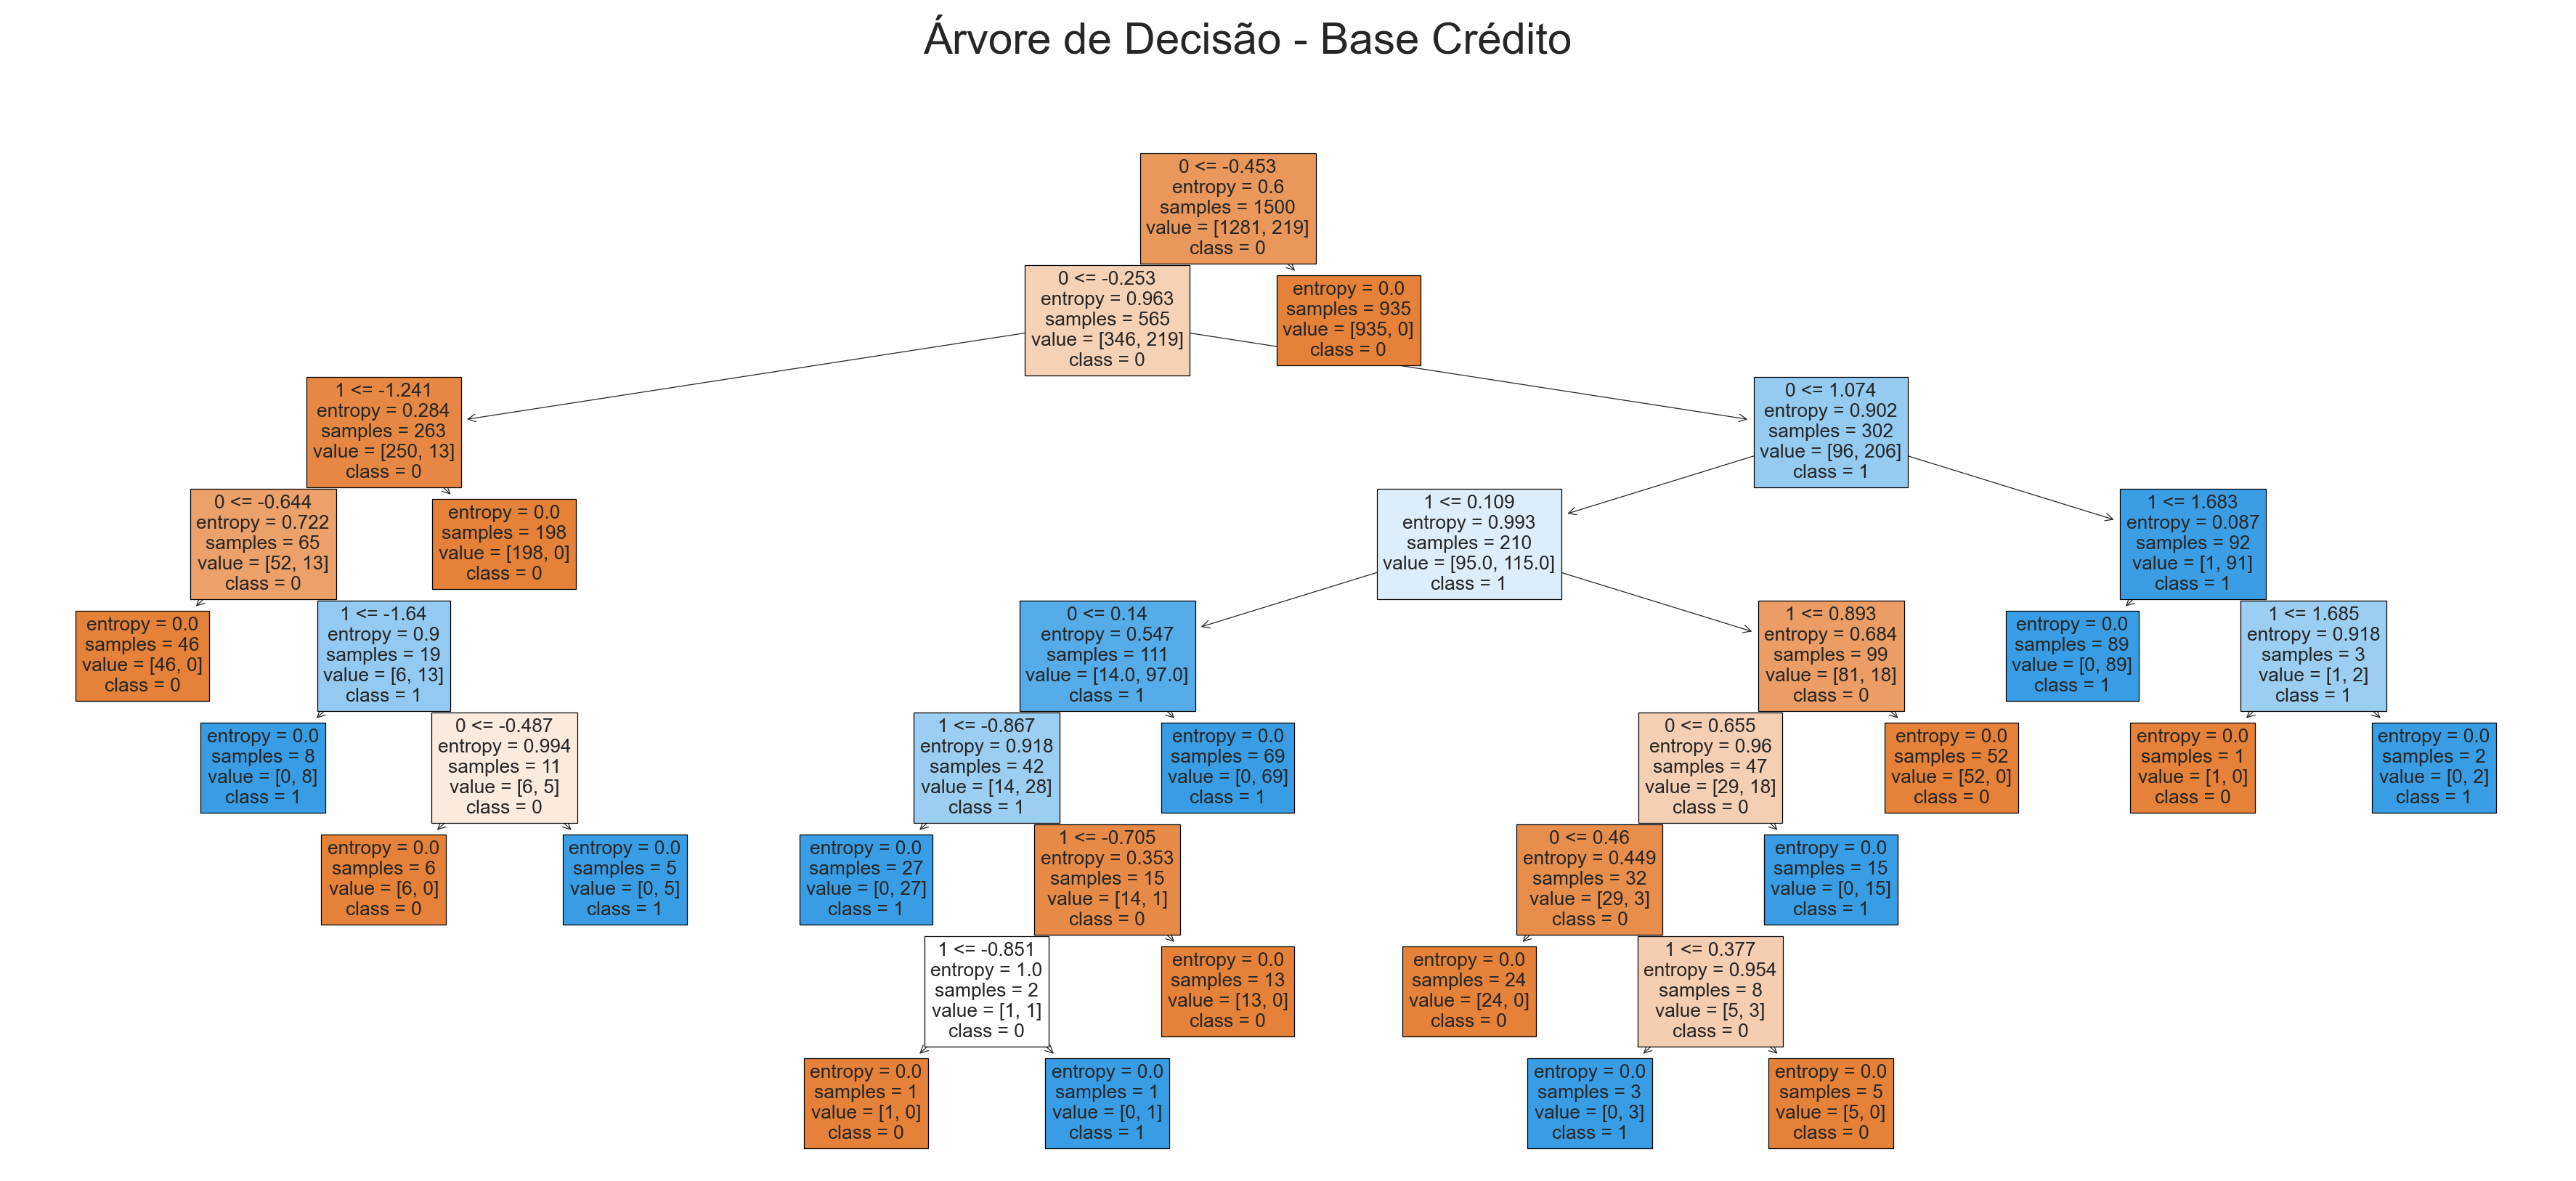

In [26]:
previsores: list[str] = ['renda', 'idade', 'emprestimo']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
plt.suptitle("Árvore de Decisão - Base Crédito")
tree.plot_tree(credit_tree, feature_names=previsoes, class_names=['0', '1'], filled=True);